# matplotlib介绍

[matplotlib文档(中文)](https://www.matplotlib.org.cn/tutorials/)

[matplotlib官方文档(英文)](https://matplotlib.org/stable/index.html)

Matplotlib是一个用于Python编程语言的2D图表库，它能够生成多种硬拷贝格式和跨平台的交互式环境下的出版质量数据图。Matplotlib可以用于生成折线图、柱状图、误差条图、散点图等。

为什么使用matplotlib
* 在数据分析和科学计算中，可视化通常更容易理解。
* matplotlib提供了大量的自定义选项和丰富的图类型。
* 可以与NumPy、Pandas等数据处理库无缝集成。

[matplotlib小抄](cheatsheets.pdf)

matplotlib中，有非常多的图形种类，因为时间关系，不可能一一介绍，这里只介绍其中最简单的一部分。其他部分还请有需要的同学自行查阅帮助文档。

可能有的同学听说过seaborn。seaborn是一个基于matplotlib的数据可视化库，提供了更高级的接口和更美观的默认样式。seaborn实际上是matplotlib的一个封装，它使用matplotlib作为底层绘图引擎。在seaborn中创建的图表对象实际上是matplotlib对象，因此可以使用matplotlib的函数进一步修改它们。本次讲座不再单独介绍，感兴趣的同学可以自行了解。

[seaborn官方文档](https://seaborn.pydata.org/tutorial.html)

## 折线图

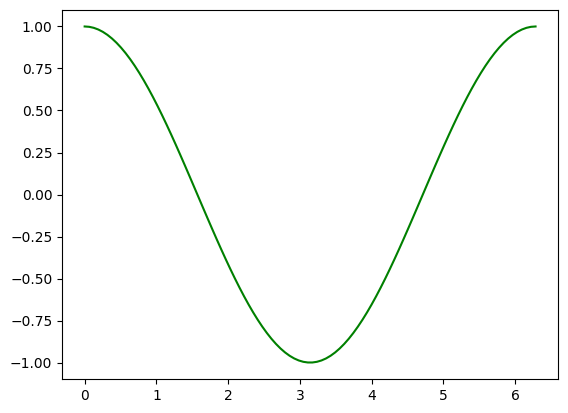

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 2*np.pi, 100)
Y = np.cos(X)
fig, ax = plt.subplots()
ax.plot(X, Y, color='green')
fig.savefig("figure.pdf")
#plt.show()

## 散点图

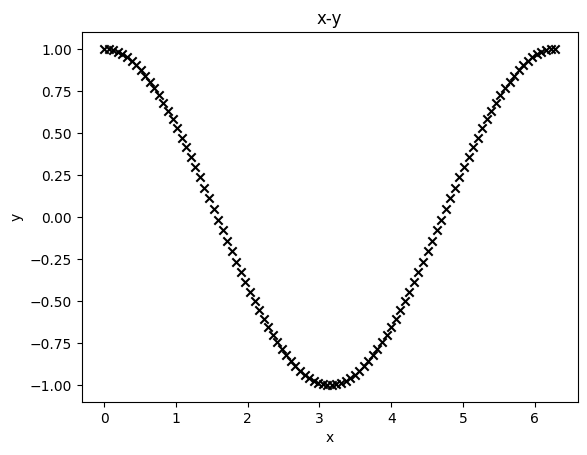

In [2]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 2*np.pi, 100)
Y = np.cos(X)
fig = plt.figure()
plt.scatter(X, Y, color='black', marker='x')
plt.xlabel('x')
plt.ylabel('y')
plt.title('x-y')
plt.show()

## 柱状图

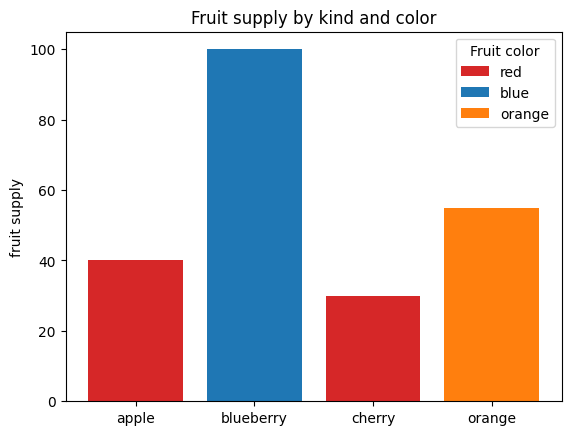

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')
plt.show()

## 中文设置
matplotlib的默认字符集不支持中文，所以想要在matplotlib中，使用中文需要经过额外设置。

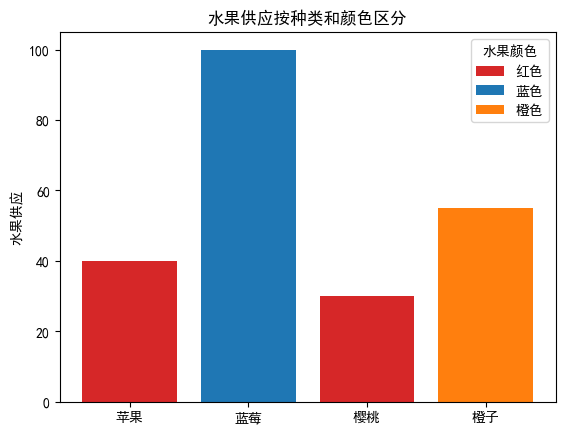

In [4]:
import matplotlib.pyplot as plt
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

fig, ax = plt.subplots()

fruits = ['苹果', '蓝莓', '樱桃', '橙子']
counts = [40, 100, 30, 55]
bar_labels = ['红色', '蓝色', '_红色', '橙色']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('水果供应')
ax.set_title('水果供应按种类和颜色区分')
ax.legend(title='水果颜色')
plt.show()

## 绘制子图
当我们想要在一个图形窗口（Figure）中分割出来的小块绘图区域来进行绘图的时候，我们就需要用到这个功能

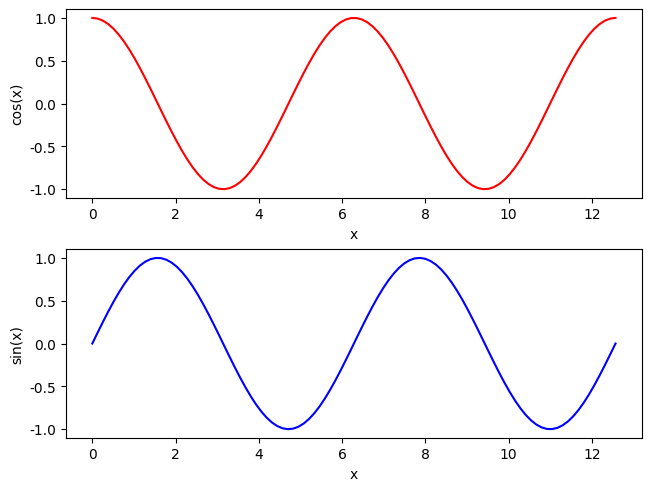

In [5]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 4*np.pi, 100)
Y1 = np.cos(X)
Y2 = np.sin(X)

# 修改回英文
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

fig, ax = plt.subplots(2, 1, layout='constrained')
ax[0].plot(X, Y1, color='red')
ax[0].set_xlabel("x")
ax[0].set_ylabel("cos(x)")
ax[1].plot(X, Y2, color='blue')
ax[1].set_xlabel("x")
ax[1].set_ylabel("sin(x)")

plt.show()

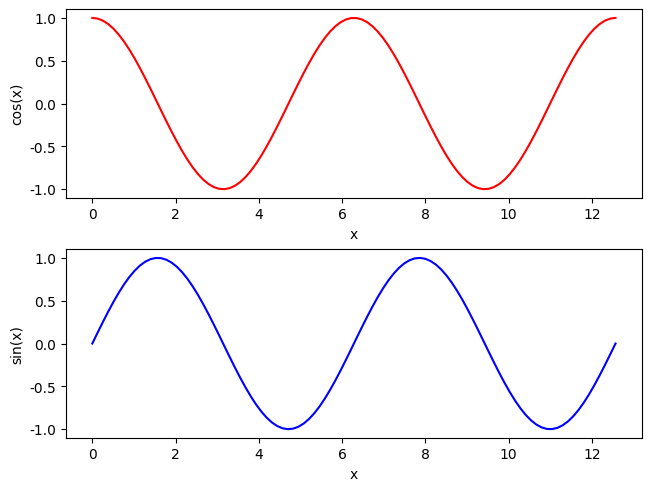

In [6]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(0, 4*np.pi, 100)
Y1 = np.cos(X)
Y2 = np.sin(X)

fig, (ax1, ax2) = plt.subplots(2, 1, layout='constrained')
ax1.plot(X, Y1, color='red')
ax1.set_xlabel("x")
ax1.set_ylabel("cos(x)")
ax2.plot(X, Y2, color='blue')
ax2.set_xlabel("x")
ax2.set_ylabel("sin(x)")

plt.show()

## 绘制频数分布直方图

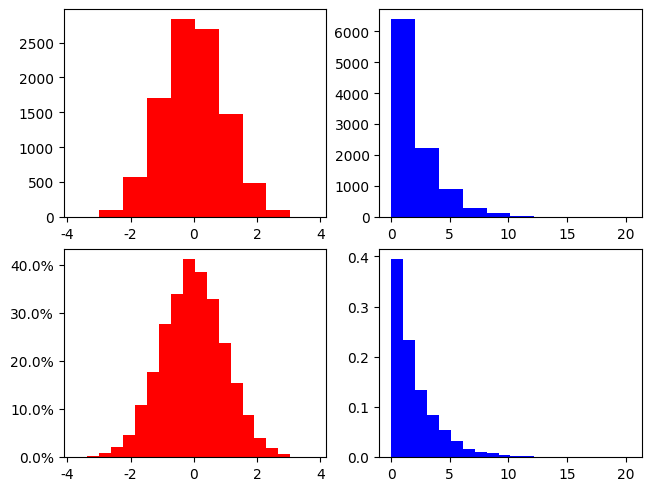

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

np.random.seed(0)  #确保结果可以重复

a = np.random.normal(loc=0,scale=1,size=10000)   #生成符合正态分布的随机数
b = np.random.chisquare(df=2,size=10000)         #生成符合自由度为2的卡方分布的随机数

fig, ax = plt.subplots(2, 2, layout='constrained')
ax[0,0].hist(a, bins=10, color='red')
ax[0,1].hist(b, bins=10, color='blue')
ax[1,0].hist(a, bins=20, color='red', density=True)
ax[1,0].yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax[1,1].hist(b, bins=20, color='blue', density=True)

plt.show()

## 绘制箱型图
是一种用于描述一组数据分布特性的图表。它可以有效地显示数据的中位数、上下四分位数以及异常值。

![boxplot](boxplot.png)

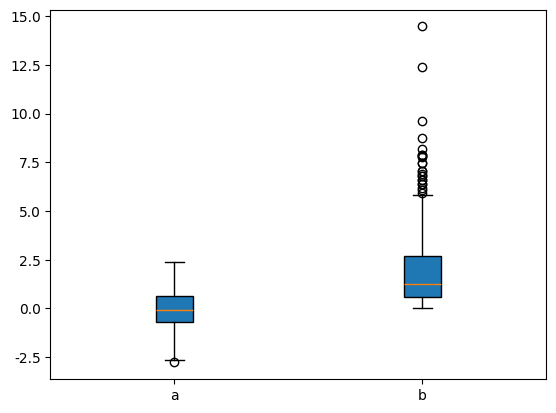

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)  #确保结果可以重复

a = np.random.normal(loc=0,scale=1,size=400)   #生成符合正态分布的随机数
b = np.random.chisquare(df=2,size=400)         #生成符合自由度为2的卡方分布的随机数
c = np.column_stack((a, b))

fig, ax = plt.subplots()
ax.boxplot(c, vert=True, patch_artist=True, labels=['a', 'b'])

plt.show()